In [ ]:
# import os

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [38]:
from fktools import *

from sklearn.model_selection import train_test_split

from dist_metric import DistributionOverlap


from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Input, Dense, Dropout

In [39]:
X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [ ]:
model = Sequential([
    Input(shape=(8,)),

    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),

    Dense(8, activation="softmax"),
])

model.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = KLDivergence(),
    metrics=[DistributionOverlap()],
)

# model learning
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
)

loss, dist_overlap = model.evaluate(
    X_test,
    y_test,
    verbose=0,
)

Epoch 1/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - dist_overlap: 0.4986 - loss: 0.8256 - val_dist_overlap: 0.6211 - val_loss: 0.5026
Epoch 2/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - dist_overlap: 0.6492 - loss: 0.4335 - val_dist_overlap: 0.6930 - val_loss: 0.3413
Epoch 3/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - dist_overlap: 0.6832 - loss: 0.3547 - val_dist_overlap: 0.7159 - val_loss: 0.2968
Epoch 4/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - dist_overlap: 0.7015 - loss: 0.3197 - val_dist_overlap: 0.7344 - val_loss: 0.2660
Epoch 5/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - dist_overlap: 0.7167 - loss: 0.2931 - val_dist_overlap: 0.7494 - val_loss: 0.2449
Epoch 6/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - dist_overlap: 0.7295 - loss: 0.2726 - val_dist_overlap: 0.7619 - val_loss: 0.2265
Epoch 7/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - dist_overlap: 0.7389 - loss: 0.2584 - val_dist_overlap: 0.7731 - val_loss: 0.2122
Epoch 8/100
1

In [41]:
print(f"test loss: {loss}")
print(f"test overlap: {dist_overlap}")

test loss: 0.17109617590904236
test overlap: 0.8093422055244446


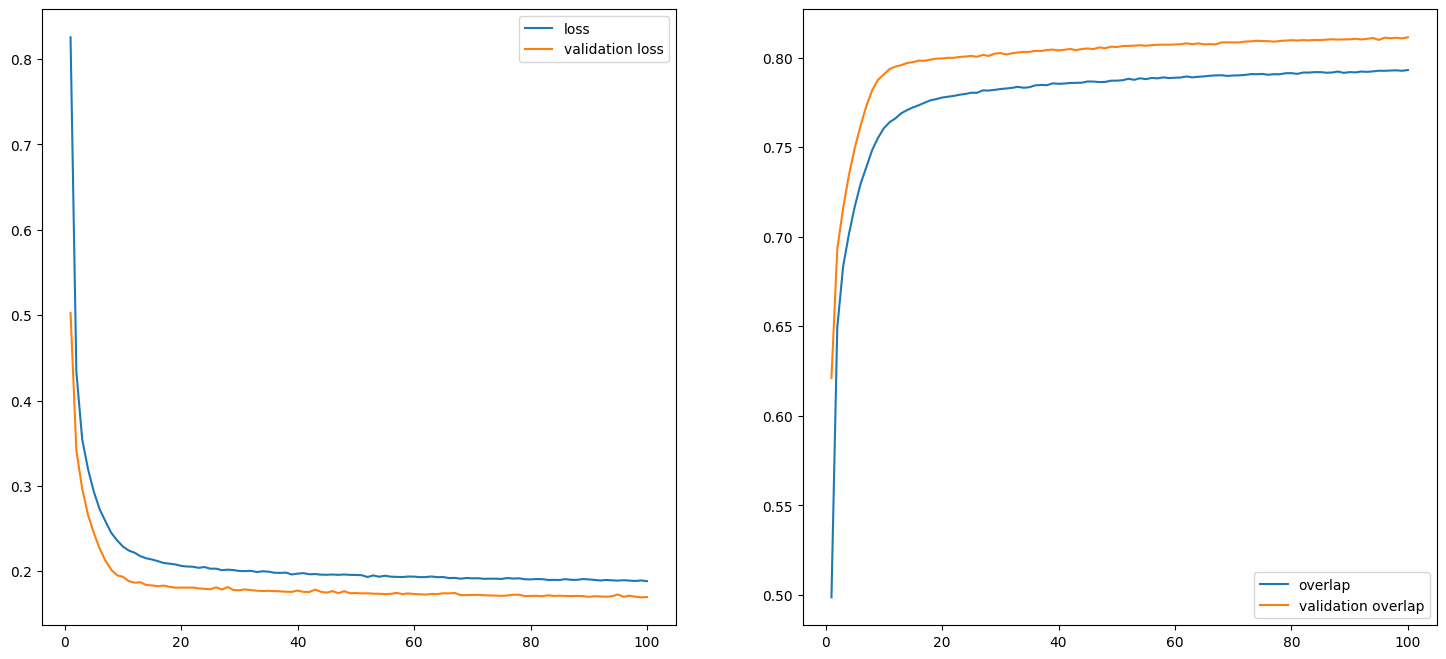

In [42]:
loss = history.history['loss']
acc = history.history['dist_overlap']

val_loss = history.history['val_loss']
val_acc = history.history['val_dist_overlap']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="validation loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="overlap")
ax[1].plot(epochs, val_acc, label="validation overlap")
ax[1].legend()